# Project: Titanic Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
> 
In history, one of the most infamous shipwrecks is the sinking of the titanic. While there were some chances of passengers surviving, some of the passengers were more likely to survive than the others. This notebook carries out an exploratory data analysis (EDA) of the titanic dataset that answers some questions on the kind of passengers that were likely to survive using the passengers data. This dataset gotten from kaggle, contains information of 891 Titanic passengers. Each row represents one person with 12 columns which describes different attributes about the passenger which includes whether they survived, the class they boarded on (Pclass), their names, sex, age, siblings and spouse that came aboard with them (SibSp), how many children and parents they came along with (Parch), their ticket numbers, the price they paid in pounds (Fare), their cabin numbers, and the port they embarked from.


In [1]:
#import neccessary packages that will be useful for his analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

#### Import the neccesary packages needed for this analysis 

<a id='wrangling'></a>
## Data Wrangling

>  In this section, the dataset is loaded and the general properties of the data is viewed to have a foresight of what it looks like, and also check for cleanliness. Here, the data set is cleaned, structured and trimmed for analysis into a desired useable format for better decision making. The techniques used in this section to clean the data includes, check for summary statistics, null values, missing values and handling them, this is to reduce statistical bias.
### General Properties

In [2]:
#load train data
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### The data is read and loaded to show a few row of the entire columns in the dataset

In [3]:
#check for general information about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### To check for a general information about the data like; data type, nulls, missing values, number of columns and rows etc. The result shows that there are in total, 891 enteries. Most of them are complete except some columns like; age, cabin and embarked. There are 2 float, 5 integers and 5 object data types.

In [4]:
#check for statistical summary
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### This shows a staistical summary of the numerical columns in the data set. The age column shows an average of 29.699 and a maximum of 80, which means the average age of people that had their details in the dataset is about 30 and the maximum 80. In the fare column there seem to be outliers present due to the extreme difference in the minimum and maximum value, there's also a very big difference between the average value and the maximum value.

In [5]:
train_df.shape

(891, 12)

#### The dataset entails 891 rows and 12 columns 

In [6]:
train_df.shape[0]

891

#### This function calls to print the number of columns in the dataset which is 891

In [7]:
train_df.shape[1]

12

#### This function calls to print the number of columns in the dataset which is 891

In [8]:
#check for missing values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### There are 177 missing values in the Age column, 687 missing values in the Cabin column, and 2 missing values in the Embarked column.

In [9]:
#check for missing values
(train_df.isna().sum()/train_df.shape[0] * 100).sort_values(ascending = False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

#### We check for the total missing values in each column to be shown as their percentage and sorted in an descending order. The Cabin column has about 77% missing values, the Age column has about 19.8% missing values, and the Embarked column has about 0.2% missing values. Columns with missing values should be gotten rid or fixed if they exceed 50%.

In [10]:
#fill in missing values in the age and cabin columns with the median (numeric variables)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

#### There are missing values in the age and cabin columns and then the age column which is a numeric variable is filled with the median. The age column is filled with the median because it is not normally distributed, hence, the mean will not be a good representative.

In [11]:
#fill in missing values in the Cabin column "unknown" (categorical variables)
train_df['Cabin'].fillna('unknown', inplace= True)

#### The missing values in the cabin column which is a categorical variable is filled with the word "unknown". This is because some of the cells in the Cabin column for some of the passengers are unknown.

In [12]:
#fill in missing values in the Embarked column "unknown" (categorical variables)
train_df['Embarked'].fillna('unknown', inplace= True)

#### The missing values in the Embarked column which is a categorical variable is filled with the word "unknown". This is also because some of the cells in the embarked column for some of the passengers are unknown.

In [13]:
#confirm
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### To confirm if the missing values have been fixed, they have been fixed.

<a id='eda'></a>
## Exploratory Data Analysis

> The dataset is ready for exploration after being trimmed and cleaned. Here,visualizations are created with the goal of addressing the research questions that have been earlier stated in the Introduction section. This section helps to understand the data set better and discover hidden trends and insights from the data.

## Univariate Analysis

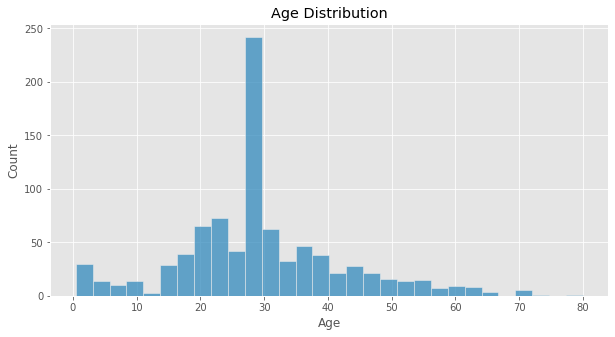

In [14]:
#check the age distribution of passengers
fig = plt.figure(figsize=(10,5))
sns.histplot(train_df.Age)
plt.title("Age Distribution");

#### The graph above shows that the age distribution is right skewed and the age of majority of passengers fall between 20 years old to 40 years old. The graph also indicates a sharp rise before 30, this might mean that most of the passengers that boarded the ship are about 26-30 years.

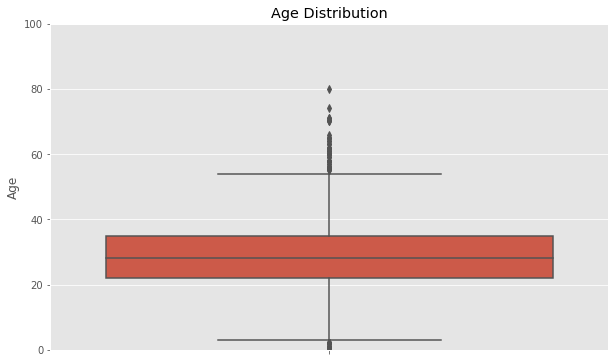

In [15]:
fig = plt.figure(figsize = (10, 6))
sns.boxplot(y=train_df.Age)
plt.ylim(0, 100)
plt.title("Age Distribution");


#### The boxplot shows the age distribution of the passengers in the dataset. Also, there are data points outside the box which are extreme values, and this signifies the presence of outliers. The plot shows that the median value falls in between 20 and 40. Taking a closer look, the median age of passengers that boarded the ship falls to about 26-28 years.

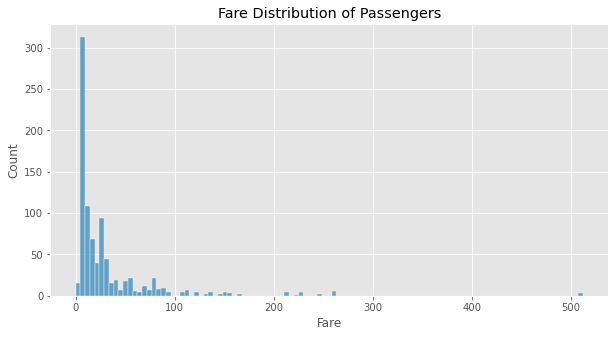

In [16]:
#check the fare distribution of passengers
fig = plt.figure(figsize=(10,5))
sns.histplot(train_df.Fare)
plt.title('Fare Distribution of Passengers');

#### The graph above shows the distribution of fare passengers paid and it is very much right skewed which means that the mean is greater than the median, hence this shows the presense of extreme values and outliers which can be seen from about a 100 dollars fare down to >500 dollars fare. It shows that most passengers paid less from about $0-$30, compared to other passengers that paid from about fifty dollars to close to 300 dollars. This might be an indicator that most people who paid the highest amount are found in the first class which has less passengers compared to the other classes. 

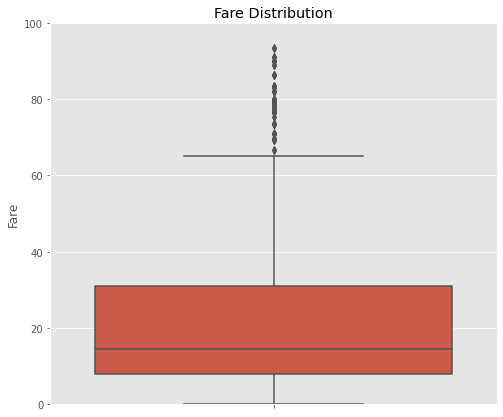

In [17]:
fig = plt.figure(figsize = (8, 7))
sns.boxplot(y= train_df.Fare)
plt.ylim(0, 100)
plt.title("Fare Distribution");

#### The boxplot above shows the fare range of passengers and the presence of outliers. There are some extreme values from about 65 pounds upwards. The median fare falls in the range of 15 pounds, which means the median value of the fare paid by passengers was about 15 pounds. However, most passengers paid a fare above the median value.

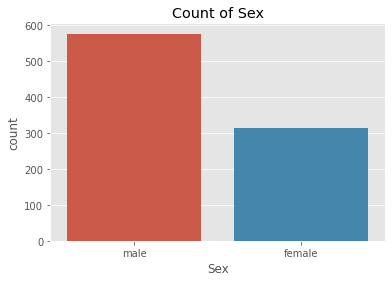

In [18]:
#check the count of sex amongst passengers
sns.countplot(x= 'Sex', data=train_df)
plt.title('Count of Sex');

In [19]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### The bar plot above shows that the male gender was the most of passengers and is almost double the number of the female gender amongst the passengers. The value count for male and female passengers are 577 and 314 respectively.

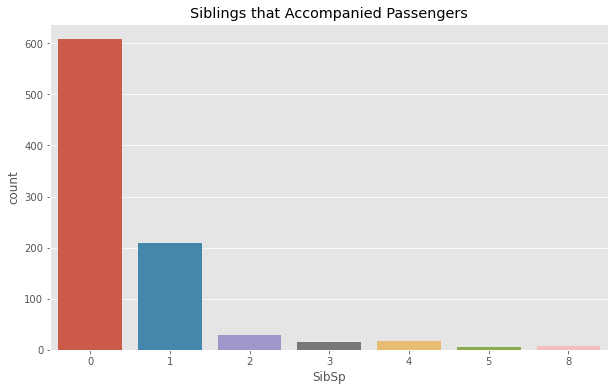

In [20]:
#check the distribution of passengers' siblings that accompanied them
fig = plt.figure(figsize=(10,6))
sns.countplot(x= 'SibSp', data=train_df)
plt.title('Siblings that Accompanied Passengers');

#### The plot above shows the number of siblings that accompanied each passenger. Most passengers came alone and just a few came along with their siblings. Some passengers on board that came with their siblings, came with 1 each. The number of passengers that came with 2 or more siblings are quitet few. 

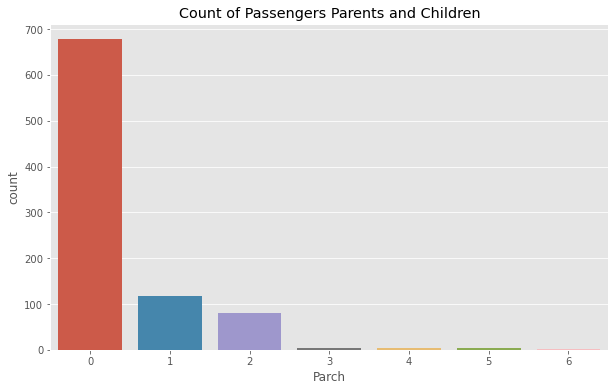

In [21]:
#check the distribution of passengers' parents and children that came aboard with them
fig = plt.figure(figsize=(10,6))
sns.countplot(x= 'Parch', data=train_df)
plt.title('Count of Passengers Parents and Children');

#### The plot above shows the number of parents and children that accompanied each passenger. Most passengers came without their parents and children. About a little above 100 passengers came with just one of their parents and/or children, and about a little below 100 passengers came with two of their parents and/or children. The number of passengers that came with 3 or more siblings are quite few just as seen in the plot.

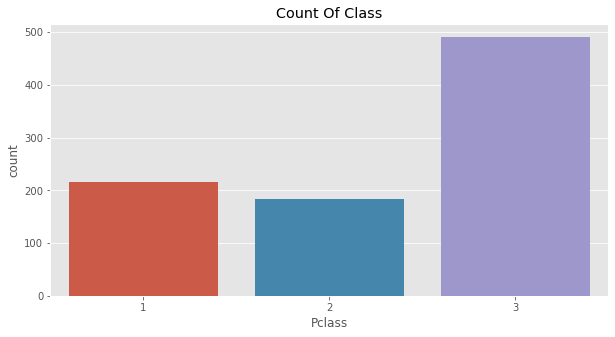

In [22]:
#check the count of class amongst passengers
fig = plt.figure(figsize=(10,5))
sns.countplot(x= 'Pclass', data=train_df)
plt.title('Count Of Class');

#### The graph above shows the count of class that the passengers took. Most passengers are found in the lower class, it is almost double of the upper and middle class. However, the upper class seemed to have a little more passengers than the middle class.  This might be because most people could not afford the price of the upper and middle class.

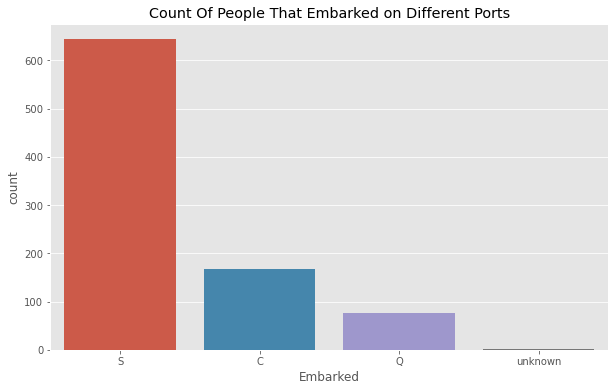

In [23]:
#check the count of passengers that embarked from different ports
fig = plt.figure(figsize=(10,6))
sns.countplot(x= 'Embarked', data=train_df)
plt.title('Count Of People That Embarked on Different Ports');

#### The plot above shows the count of passengers that embarked from different ports. Most passengers embarked from the Southampton port, less than half of the passengers embarked from the Cherbourg port and very few people embarked from Queenstown port. The ports where very tiny percentage of passengers embarked was not recorded

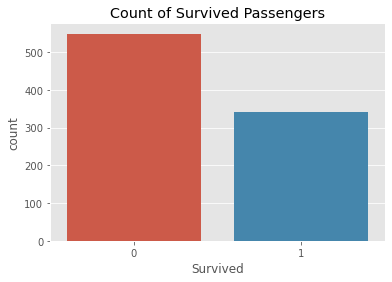

In [24]:
#check the count of survived  passengers
sns.countplot(x= 'Survived', data=train_df)
plt.title('Count of Survived Passengers');

In [25]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### The plot above shows the count of survived passengers. Most people did not survive, while a few people did.  The value count for  passengers that survived and did not survive are 549 and 342 respectively.

## Bivariate Analysis

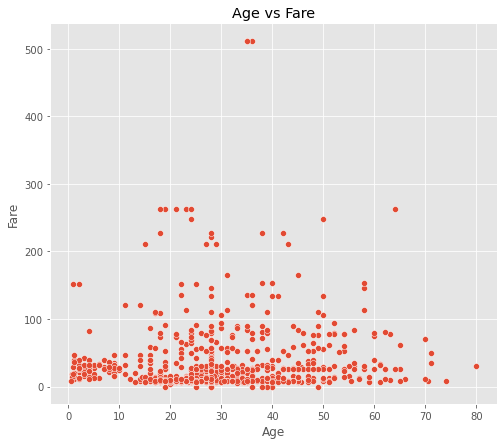

In [26]:
#use a scatter plot to check for correlation between age and fare

def plot_scatter(a,b,c):
    fig = plt.figure(figsize=(8, 7))
    sns.scatterplot(x=a, y=b, data=c)
    plt.title('Age vs Fare')
    plt.xlabel('Age')
    plt.ylabel('Fare')
plot_scatter('Age', 'Fare', train_df)

#### A defined function for scatter plot is used, to avoid writing repeatitive codes in constructing other scatter plots. In the above graph, a scatter plot is used to check for the correlation between age and fare. The diagram insinuates that there is not exactly a correlation between the passengers' fare and age, as the fare increases, the ages still remains within the same range, so we cannot say there is an exact correlation between the fare paid by passengers and their age.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


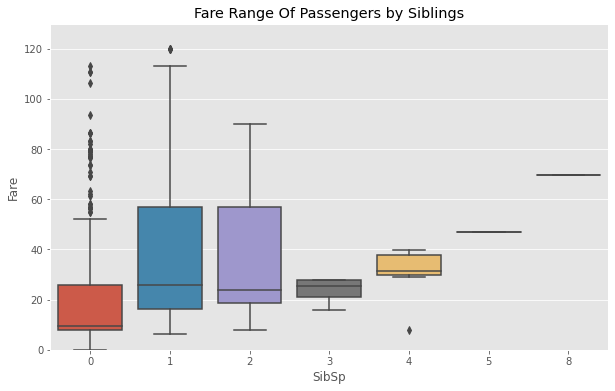

In [27]:
#boxplot showing siblings age
fig = plt.figure(figsize=(10,6))
plt.ylim(0, 130)
sns.boxplot(train_df.SibSp, train_df.Fare)
plt.title('Fare Range Of Passengers by Siblings');

#### The boxplot above shows the fare range of passengers by the number of siblings they came aboard with. The median value of passengers that came on board with no sibling is quite low compared to those who came along with their siblings, which means, passengers who came with no siblings paid quite lesser fare amount than passengers who came with one or more siblings. The passengers who came with 1, 2, and 3 siblings have a median value of about the same fare price. There seem to be an outlier in the value of passengers who came with 4 siblings. Passengers who came with 5 and 8 siblings have no value representation.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


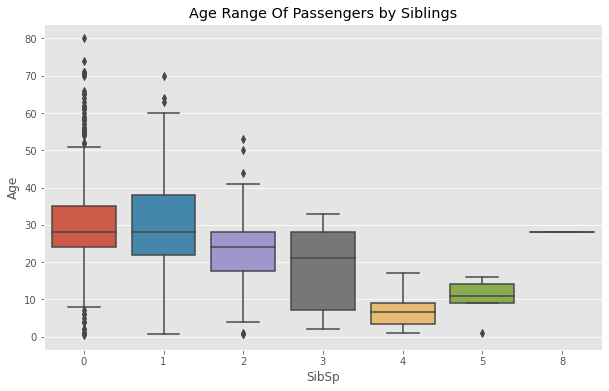

In [28]:
#boxplot showing siblings age
fig = plt.figure(figsize=(10,6))
sns.boxplot(train_df.SibSp, train_df.Age)
plt.title('Age Range Of Passengers by Siblings');

#### The boxplot above shows the age range of passengers by the number of siblings they came aboard with. Most people that came on board without any sibling, have their median age value to be about 28 years. Those who came with one sibling have their median age value to be about 30 years. Passengers who came with two siblings have their median age value to be about 24-25 years. Those who came with three siblings have their median age value to be about 9-10 years. Passengers who came with four siblings have their median age value to be about 7-8 years. Passengers who came with five siblings have their median age value to be about 12 years. This trend might be an indication that younger people had their older siblings come along with them. Meanwhile, the boxplot shows some extreme present in the representation of passengers with 1, 2, 3, 5 and no siblings.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


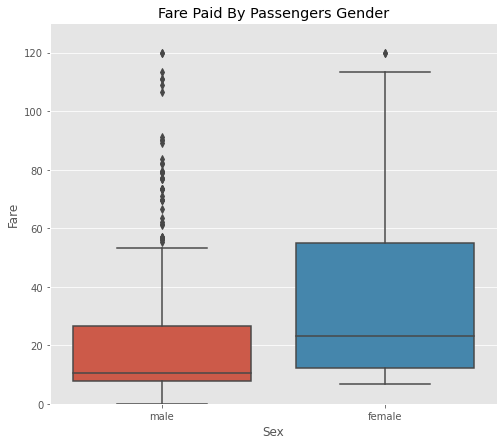

In [29]:
#boxplot showing fare range each sex paid
fig = plt.figure(figsize=(8,7))
plt.ylim(0, 130)
sns.boxplot(train_df.Sex, train_df.Fare)
plt.title('Fare Paid By Passengers Gender');

#### The boxplot above shows the fare passengers paid based on their gender. There are some extreme values from about 55 pounds upwards on the male data point and also an extreme value from about 120 pounds upward on the female data point. The median value of the fare paid by the male passengers is quite low- about 10pounds, compared to the female passengers which is about 25pounds. The plot also shows that most female passengers paid more.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


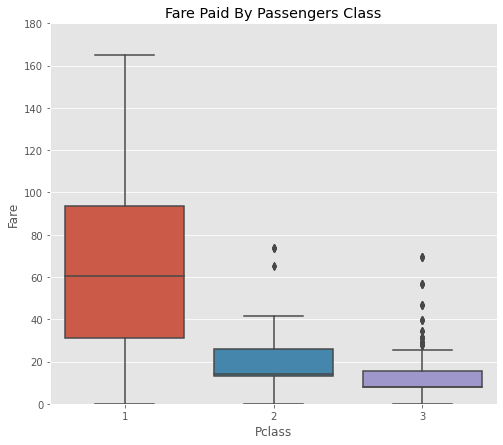

In [30]:
#boxplot showing fare range by passengers' class
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Pclass, train_df.Fare)
plt.ylim(0, 180)
plt.title('Fare Paid By Passengers Class');

#### The boxplot above shows the fare passengers paid by the class they boarded. More passengers in the upper class paid more fare compared to the passengers in the other classes. The median value of passengers that boarded on the upper class is quite high, about 60 pounds compared to those who boarded the middle and lower class, which means, passengers who boarded in the upper class paid a higher amount of fare amount than passengers who boarded the middle and lower class. The median value of passengers that boarded on the middle class is about 12 pounds and those that boarded on the lower class is about 9-10pounds. There are some extreme values in the fare of passengers that boarded the middle and lower class. It is safe to say that the higher the class, the higher the fare passengers paid.

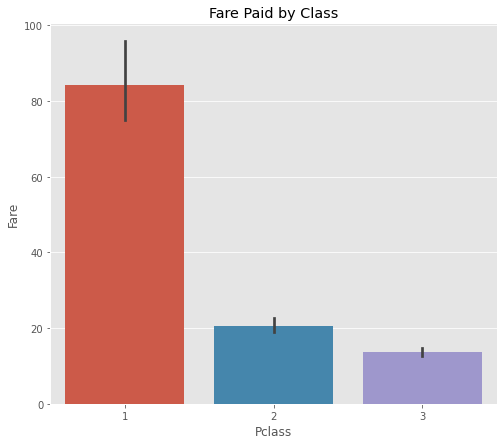

In [31]:
#we visualise the ratio of fare paid by class
fig = plt.figure(figsize=(8,7))
sns.barplot(x='Pclass', y = 'Fare', data =train_df)
plt.title('Fare Paid by Class');

#### The plot above shows the relationship between the fare passengers paid and their class. There seem to be an increase in the fare as the class increases. The upper class has an indicator of a higher fare than the middle and lower class. The average fare paid by passengers at the upper class is about 4 times the price paid in the middle and lower classes.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


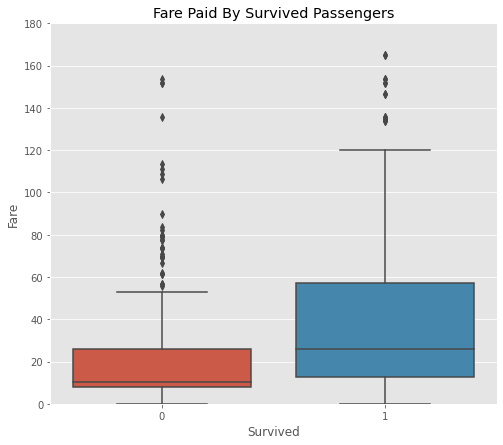

In [32]:
#boxplot showing fare range by passengers' that survived
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Survived, train_df.Fare)
plt.ylim(0, 180)
plt.title('Fare Paid By Survived Passengers');

#### The boxplot above shows the fare paid by survived and non survived passengers. Most survived passengers paid more than the ones who did not survive. the median value for the non-survived passengers is about 10-12 pounds, while the median value for those who survived is about 28 pounds. Since some passengers paid a higher fare in the upper class and the boxplot above shows that passengers who paid more fare survived, it is safe to say that more people in the upper class survived or had more chance of survival than those in the other classes.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


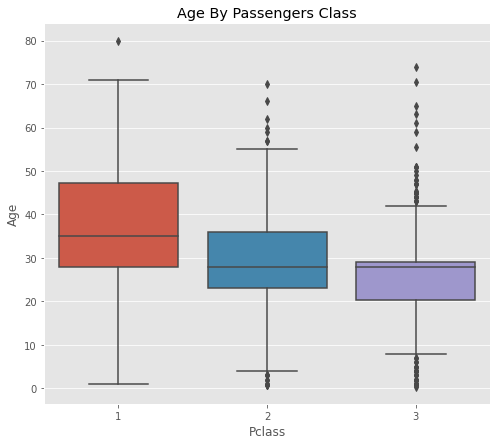

In [33]:
#boxplot showing age by passenger's class
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Pclass, train_df.Age)
plt.title('Age By Passengers Class');

#### The boxplot above shows the age range of passengers by the class they boarded. The plot shows that older people boarded the upper class while younger ones boarded the middle and lower class. The median age value of passengers who boarded the upper class is about 35 and those who boarded the middle and lower class is about 27-28 years old. However, there seems to be some extreme values in the age of passengers who boarded the middle and lower class.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


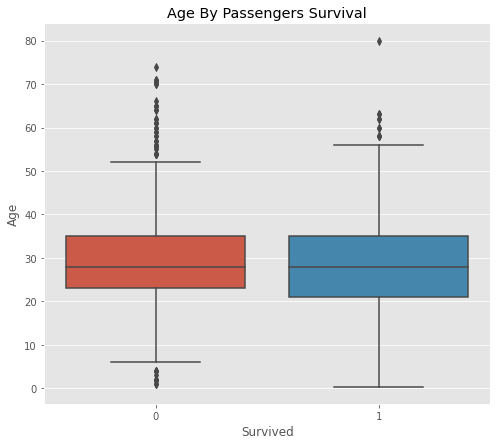

In [34]:
#boxplot showing age range by passenger's survival
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Survived, train_df.Age)
plt.title('Age By Passengers Survival');

#### The box plot above shows the age of the passengers by their survival. The median age value of passengers who survived and did not survival are about the same- about 27-28 years. There are also outliers present in the values of both survived and non-survived passengers.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


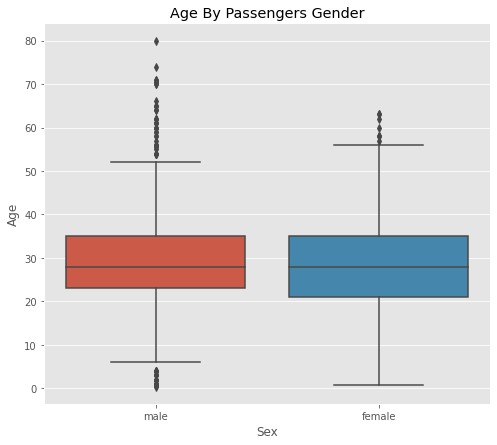

In [35]:
#boxplot showing age range by passenger's survival
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Sex, train_df.Age)
plt.title('Age By Passengers Gender');

#### The above boxplot shows the age of passengers gender. The median value of both genders are almost the same. The male gender have their age median value to be about 30 years while that of the female gender have their age median to be value to be about 28 years.

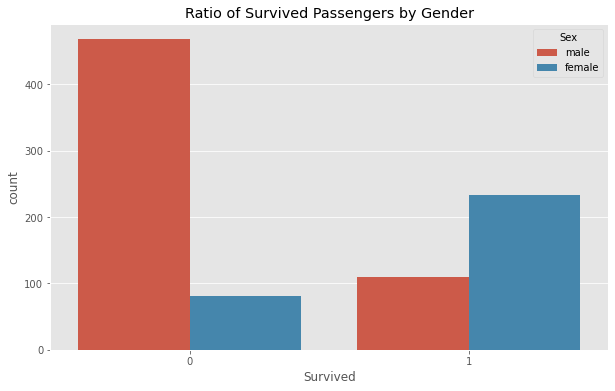

In [36]:
#we visualise the count of poeple that survived
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Survived', hue = 'Sex', data =train_df)
plt.title('Ratio of Survived Passengers by Gender');

#### The graph above shows that most passengers did not survive. However, it shows that most of the passengers that did not survive are the male gender, while most of the passengers that survived are the female gender. Since most people did not survive in this shipwreck, this might be an indication that most of the passengers on board were men.

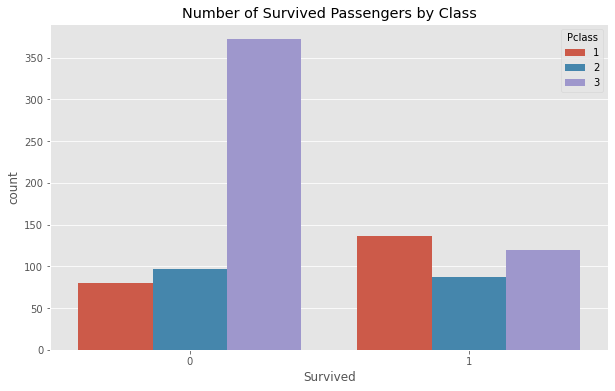

In [37]:
#we visualise the number of people that survived and their class
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue= 'Pclass',data=train_df)
plt.title('Number of Survived Passengers by Class');

#### The graph above shows that most passengers that did not survive were in the lower class of the ship, this might mean that there was less protective or survival equipment in the lower class section of the ship or the rescue team prioritised the people on the first class

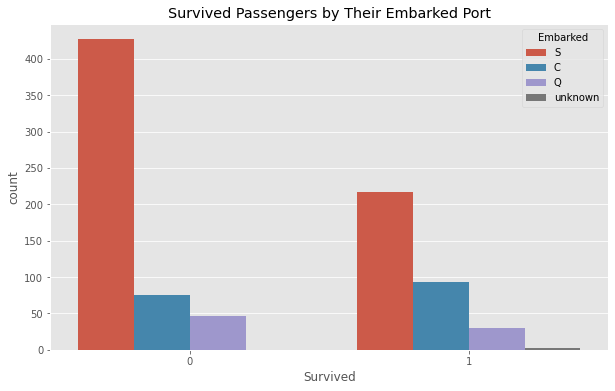

In [38]:
#we visualise the number of poeple that survived by the port that they embarked from
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue= 'Embarked',data=train_df)
plt.title('Survived Passengers by Their Embarked Port');

#### The graph above shows the count of passengers survival by the port they embarked from. Most passengers that embarked from the Southampton port did not survive compared to those that survived. More passengers that embarked from the Cherbourg port survived compared to those who did not survive. Also, most passengers who embarked from the Queenstown port did not survive compared to those who did survive.

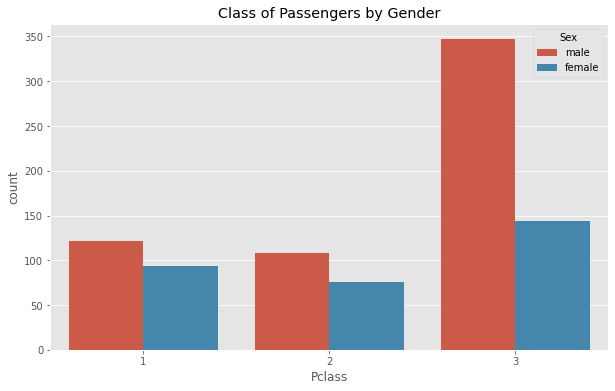

In [39]:
#we visualise the class of passengers by their gender
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue = 'Sex', data =train_df)
plt.title('Class of Passengers by Gender');

#### The plot above shows that the male gender dominated all the classes. There seems to be a little difference in the count of passengers genders that boarded on the upper and middle class, however, there is a significant difference in the count of passengers genders that boarded on the lower class. The lower class is signifiacntly dominated by the male gender.

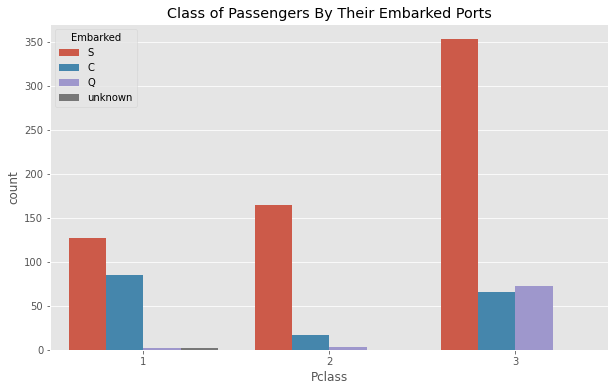

In [40]:
#we visualise the class of passenger's by the port they embarked from
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue = 'Embarked', data =train_df)
plt.title('Class of Passengers By Their Embarked Ports');

#### The graph shows the class of passengers by the port they embarked from. Most passengers embarked from the Southampton port but more significantly, passengers that boarded in the lower class are more compared to passengers that boarded in the upper and middle class from the Southampton port. Most passengers in the upper class boarded from the Cherbourg port, since most passengers in the upper class survived, it is safe to say that most people who survived boarded from the Cherbourg port. Very few people in the upper and middle class boarded from the Queenstown's port compared to the lower class passengers who boarded from the Queenstown's port.

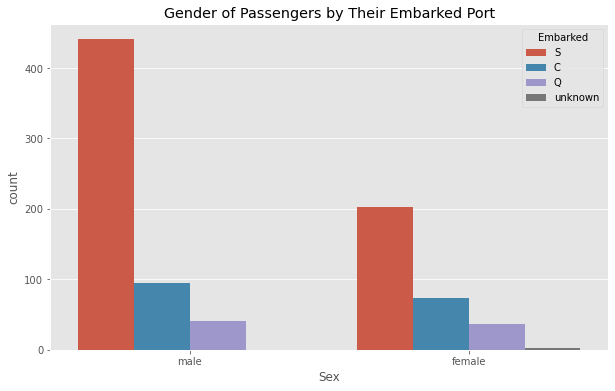

In [41]:
#we visualise the number of poeple that survived by the port that they embarked from
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue= 'Embarked',data=train_df)
plt.title('Gender of Passengers by Their Embarked Port');

#### The plot above shows the gender of passengers by the different ports that they embarked from. Overlly, most male and female embarked from the Southampton port, then the other few passengers embarked from Cherbourg port and from Queenstown. The ship probably was not filled to capacity at its initial boarding and decided to stop over to pick other passengers at the other ports.

## Multivariate Analysis

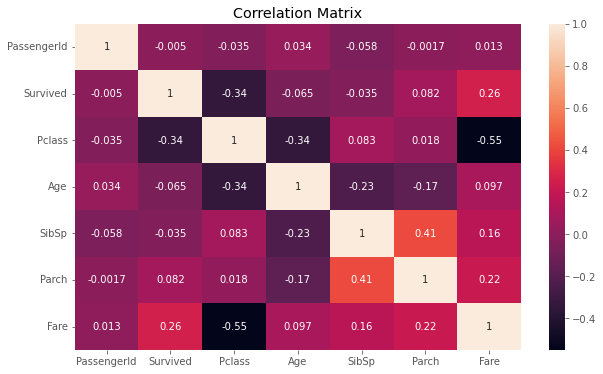

In [42]:
#to find correlation between attributes
fig = plt.figure(figsize = (10,6))
sns.heatmap(train_df.corr(), annot=True)
plt.title('Correlation Matrix');

#### There seem to be little or no significance in the correlation of the variables. The colors of each box represents how correlated the variables are with each other. Boxes that approach brighter color shows more correlations and the ones that approach deep purple color shows how less correlated the variables are. The highest corellated variables in the graph is the parch and passengers siblings, which isn't significant becausethey are just 41% (0.41) correlated which is not even up to 50%. The least corellated variables is the Fare and Passengers' class variables with a -0.55 correlation point.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


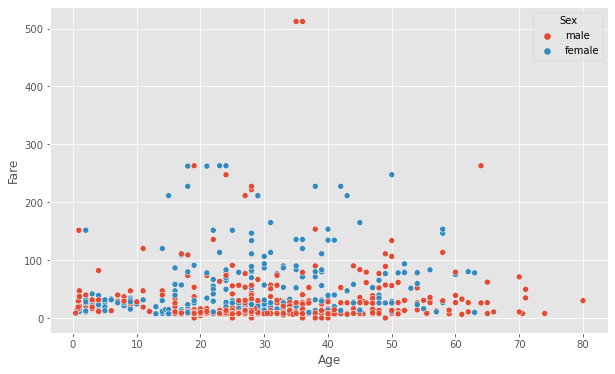

In [43]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(train_df.Age, train_df.Fare, hue=train_df.Sex);

#### The scatter plot above shows no correlation between the age of passengers and the fare they paid regardless of the passenger's gender.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


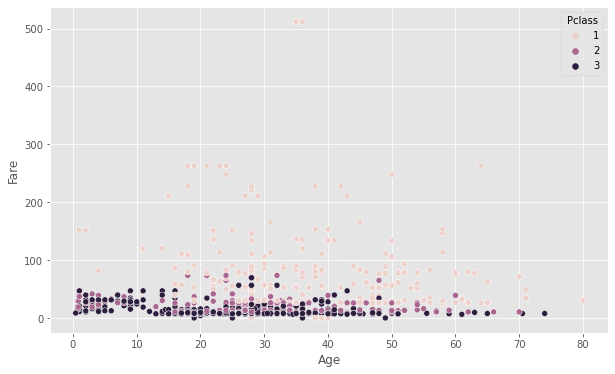

In [44]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(train_df.Age, train_df.Fare, hue=train_df.Pclass);

#### The scatter plot above shows no correlation between the age of passengers and the fare they paid regardless of the class that the passengers boarded on.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


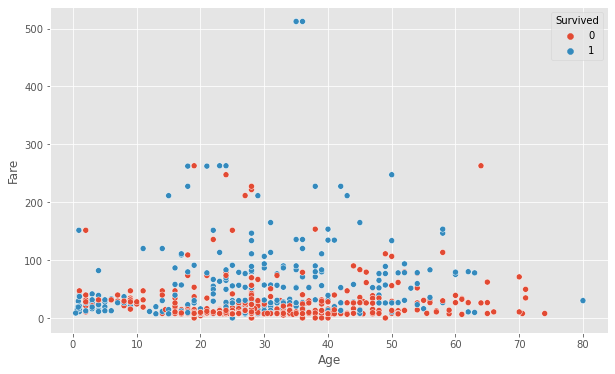

In [45]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(train_df.Age, train_df.Fare, hue=train_df.Survived);

#### The scatter plot above shows no correlation between the age of passengers and the fare they paid regardless of the passengers' survival. Hence, generally, it is safe to say that there is no correlation between the age and fare variable in the dataset.

<a id='conclusion'></a>
## Conclusion